In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from small_script.myFunctions import *

import Bio.PDB as bio
d3_to_index = bio.Polypeptide.d3_to_index  # we may want to adjust this in the future.

plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [59]:
pre = "/Users/weilu/Research/optimization/fragment/"
database = "/Users/weilu/Research/optimization/fragment/database/dompdb/"

In [24]:
a = "/Users/weilu/Research/optimization/fragment/database/dompdb/12asA00.pdb"
b = "/Users/weilu/Research/optimization/fragment/database/dompdb/2a01C01.pdb"

In [46]:
parser = bio.PDBParser()
structure = parser.get_structure("x", a)

In [31]:
c = structure[0]["A"]

In [49]:
ppb=bio.CaPPBuilder()
for pp in ppb.build_peptides(structure):
    print(pp.get_sequence())

AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAVRESVPSLL


In [51]:
pwd

'/Users/weilu/opt/notebook/Optimization'

# another format. with all dis for one frag

In [ ]:
min_seq_sep=3
max_seq_sep=9
parser = bio.PDBParser(QUIET=True)
three_to_one = bio.Polypeptide.three_to_one

pdb_list = os.listdir(database)
# pdb_list = ['1w5cC02.pdb']
# pdb_list = ['3zciA00.pdb']
for cc, pdb in enumerate(pdb_list):
    has_something = False
    pdbId = pdb.split('.')[0]
#     print(pdbId)
#     if cc == 2:
#         break
    if cc % 200 == 0:
        print(cc)
    with open(pre+f"processed_3/{pdbId}.csv", "w") as out:
#         out.write("pdb,i,j,res1,res2,dis_ca_ca,dis_ca_cb,dis_cb_ca,dis_cb_cb\n")
        structure = parser.get_structure("x", os.path.join(database, pdb))
        for model in structure:
            for chain in model:
                all_residues = list(chain)
#                 print(all_residues)
                for i, residue in enumerate(all_residues):
                    outLine = ""
                    need = True
                    dis_ca_ca = []
                    dis_ca_cb = []
                    dis_cb_ca = []
                    dis_cb_cb = []
                    resId = residue.get_id()[1]
                    frag = all_residues[i:i+max_seq_sep]
                    resseq_list = [x.get_id()[1] for x in frag]
                    fragSeq = "".join([three_to_one(x.get_resname()) for x in frag])
#                     print(i, fragSeq)
                    if len(frag) != 9:
                        continue
                    if not np.all(np.ediff1d(resseq_list)==1):
#                         print(f"mismatch, {resId}, {resseq_list}")
                        continue
                    for ii in range(7):
                        if not need:
                            break
                        try:
                            r1 = frag[ii]
                        except Exception as ex:
                            need = False
                            break
                        # print(i, residue.get_resname())
                        for j, r2 in enumerate(frag[(min_seq_sep+ii):]):
                            # The H of GLY is replaced with CB in this dataset
                            try:
                                dis_ca_ca.append(str(r1["CA"] - r2["CA"]))
                                dis_ca_cb.append(str(r1["CA"] - r2["CB"]))
                                dis_cb_ca.append(str(r1["CB"] - r2["CA"]))
                                dis_cb_cb.append(str(r1["CB"] - r2["CB"]))
                            except Exception as ex:
    #                             print(pdbId, ex)
                                os.system(f"echo '{pdbId}' >> {pre}/without_discontinues_and_gly_exception_2")
                                need = False
                                break
                            outLine += f"{pdbId},{i},{j},{residue.get_resname()},{r2.get_resname()},{dis_ca_ca},{dis_ca_cb},{dis_cb_ca},{dis_cb_cb}\n"
                    if need:
                        outLine = f"{pdbId},{i},{fragSeq},"+",".join(dis_ca_ca)+"\n"
                        outLine += f"{pdbId},{i},{fragSeq},"+",".join(dis_ca_cb)+"\n"
                        outLine += f"{pdbId},{i},{fragSeq},"+",".join(dis_cb_ca)+"\n"
                        outLine += f"{pdbId},{i},{fragSeq},"+",".join(dis_cb_cb)+"\n"
                        out.write(outLine)
#         if has_something:
#             print(pdbId)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800


In [90]:
min_seq_sep=3
max_seq_sep=9
parser = bio.PDBParser(QUIET=True)

pdb_list = os.listdir(database)
# pdb_list = ['1w5cC02.pdb']
for cc, pdb in enumerate(pdb_list):
    has_something = False
    pdbId = pdb.split('.')[0]
#     print(pdbId)
#     if cc == 2:
#         break
    if cc % 200 == 0:
        print(cc)
    with open(pre+f"processed_2/{pdbId}.csv", "w") as out:
#         out.write("pdb,i,j,res1,res2,dis_ca_ca,dis_ca_cb,dis_cb_ca,dis_cb_cb\n")
        structure = parser.get_structure("x", os.path.join(database, pdb))
        for model in structure:
            for chain in model:
                all_residues = list(chain)
                for i, residue in enumerate(all_residues):
                    outLine = ""
                    need = True
                    # print(i, residue.get_resname())
                    hetflag, resseq, icode = residue.get_id()
                    old_resseq = resseq + min_seq_sep - 1
                    for j, r2 in enumerate(all_residues[i+min_seq_sep:i+max_seq_sep+1]):
                        hetflag, resseq, icode = r2.get_id()
                        if resseq != old_resseq + 1:
#                             print(f"mismatch, {resseq}, {old_resseq}, {i}, {j}")
                            need = False
                            has_something = True
                            break
                        else:
                            old_resseq += 1

                        # The H of GLY is replaced with CB in this dataset
                        try:
                            dis_ca_ca = residue["CA"] - r2["CA"]
                            dis_ca_cb = residue["CA"] - r2["CB"]
                            dis_cb_ca = residue["CB"] - r2["CA"]
                            dis_cb_cb = residue["CB"] - r2["CB"]
                        except Exception as ex:
#                             print(pdbId, ex)
                            has_something = True
                            os.system(f"echo '{pdbId}' >> {pre}/without_discontinues_and_gly_exception")
                            need = False
                            break
                        outLine += f"{pdbId},{i},{j},{residue.get_resname()},{r2.get_resname()},{dis_ca_ca},{dis_ca_cb},{dis_cb_ca},{dis_cb_cb}\n"
                    if need:
                        out.write(outLine)
#         if has_something:
#             print(pdbId)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400


In [95]:
# combine all to one data.
pdb_list = os.listdir("/Users/weilu/Research/optimization/fragment/processed_2/")
for cc, pdb in enumerate(pdb_list):
    os.system(f"cat /Users/weilu/Research/optimization/fragment/processed_2/{pdb} >> /Users/weilu/Research/optimization/fragment/data_jan14.csv")

In [68]:
min_seq_sep=3
max_seq_sep=9
parser = bio.PDBParser(QUIET=True)

pdb_list = os.listdir(database)
for cc, pdb in enumerate(pdb_list):
    pdbId = pdb.split('.')[0]
    if cc % 1000 == 0:
        print(cc)
    with open(pre+f"processed/{pdbId}.csv", "w") as out:
#         out.write("pdb,i,j,res1,res2,dis_ca_ca,dis_ca_cb,dis_cb_ca,dis_cb_cb\n")
        structure = parser.get_structure("x", os.path.join(database, pdb))
        try:
            for model in structure:
                for chain in model:
                    all_residues = list(chain)
                    for i, residue in enumerate(all_residues):
            #             print(i, residue.get_resname())
                        for j, r2 in enumerate(all_residues[i+min_seq_sep:i+max_seq_sep+1]):
                            dis_ca_ca = residue["CA"] - r2["CA"]
                            # The H of GLY is replaced with CB in this dataset
                            dis_ca_cb = residue["CA"] - r2["CB"]
                            dis_cb_ca = residue["CB"] - r2["CA"]
                            dis_cb_cb = residue["CB"] - r2["CB"]
                            out.write(f"{pdbId},{i},{j},{residue.get_resname()},{r2.get_resname()},{dis_ca_ca},{dis_ca_cb},{dis_cb_ca},{dis_cb_cb}\n")
        except Exception as ex:
            print(pdbId, ex)
            os.system(f"echo '{pdbId}' >> {pre}/error_message")
                        


0
1w5cC02 'CB'
1x6zA00 'CA'
2vqeL00 'CB'
3fhxA00 'CB'
2j3tB00 'CB'
1fbsA00 'CB'
1w97L01 'CB'
2yqyA00 'CA'
2uxeA00 'CB'
2p7hA00 'CB'
2xseA00 'CB'
1ur3M00 'CB'
1000
2j01100 'CB'
2y43A00 'CB'
1c5aA00 'CB'
1w79A01 'CB'
3qtaA00 'CB'
1vkbA00 'CB'
2iu1A00 'CB'
5a1nB00 'CA'
1ofuX00 'CB'
4avrA00 'CB'
1ofcX04 'CB'
2000
1grlA03 'CB'
1o9nA00 'CB'
2bz0A00 'CB'
3iteA00 'CB'
1cm3A00 'CA'
2wrzA02 'CB'
2wp8A00 'CB'
1usdA00 'CB'
2vyrA00 'CB'
3000
2cmrA00 'CB'
2c81A02 'CB'
2iu5B00 'CB'
2bzvA00 'CA'
1urjA03 'CB'
3vqjA00 'CA'
1pu6A01 'CB'
2c7fE01 'CB'
1w3fA02 'CB'
1cy5A00 'CB'
1i24A01 'CB'
4000
3gb8B00 'CB'
3dmlA00 'CB'
5teeA01 'CB'
2g8lA01 'CB'
2qe8A00 'CB'
2vpzC00 'CB'
2xitA00 'CB'
4ghbA00 'CA'
2uuzB00 'CB'
2y38A02 'CB'
1obbA00 'CB'
3zfjA00 'CB'
2j16A00 'CB'
4ak2A02 'CB'
5000
2o0aA00 'CB'
3k0xA00 'CB'
2jd3A01 'CB'
2bs2B02 'CB'
5fpoA01 'CA'
2oh1A00 'CB'
3km5A00 'CB'
2vhoB01 'CB'
1bgwA03 'CB'
2vpzA05 'CB'
4mtlA00 'CB'
2w0iA00 'CB'
6000
2vo8A00 'CB'
1b8bA00 'CB'
4adiB04 'CA'
2w1kA00 'CB'
2vwaA00 'CB'
1o88A0

In [ ]:
    #                 if residue.get_resname() == "GLY":
    #                     print(list(residue), residue["CB"].get_vector())
    #                 print(i, j, dis_ca_ca, residue["CA"].get_vector(), r2["CA"].get_vector())

In [15]:
for model in structure:
    for chain in model :
        polypeptides = Bio.PDB.PPBuilder().build_peptides(chain)
        for poly_index, poly in enumerate(polypeptides) :
            print(f"Model {model.id} Chain {chain.id}",)
            print("(part %i of %i)" % (poly_index+1, len(polypeptides)))
            print("length %i" % (len(poly)),)
            print("from %s%i" % (poly[0].resname, poly[0].id[1]),)
            print("to %s%i" % (poly[-1].resname, poly[-1].id[1]))
            print(poly.get_phi_psi_list())

Model 0 Chain A
(part 1 of 1)
length 327
from ALA4
to LEU330
[(None, 2.755865773347726), (-0.7263727222595183, -0.9913716409179782), (-0.9681369489362346, -0.8924334469455821), (-0.9499990608872447, -1.0182758578625297), (-0.9479768993361841, -0.6854089767784127), (-1.0712313384452894, -0.5852157016397055), (-1.5034558518765502, -0.564523215818365), (-0.9230340286794444, -0.9997785236781394), (-0.9384171785077553, -0.8810425939691152), (-0.9719864669835374, -0.7281216718353706), (-1.1281868035944738, -0.7835953932861571), (-1.0655430279228988, -0.946022335991926), (-1.0906293536226301, -0.5212158108961245), (-1.4045799619748414, -0.9362936255519249), (-0.9316345730833568, -0.8785416318071398), (-1.1752775054907985, -0.5029134798688377), (-1.0093567696173975, -0.7488781161412928), (-1.2294547581421433, -0.5736097301990386), (-1.031986559535758, -0.5985467212419624), (-1.3098925215060278, -0.6222877619230646), (-1.3030675451506892, -0.655380619450542), (-1.5284971999208499, -0.7071486532

In [26]:
from small_script.rama_lib.ramachandran_calc import ramachandran
plt.rcParams['figure.figsize'] = [16.18033, 10]

12asA00.pdb <Model id=0> <Chain id=A> ASP207 is an outlier
2a01C01.pdb <Model id=0> <Chain id=C> LYS40 is an outlier
2a01C01.pdb <Model id=0> <Chain id=C> GLU92 is an outlier
2a01C01.pdb <Model id=0> <Chain id=C> GLU139 is an outlier
2a01C01.pdb <Model id=0> <Chain id=C> LEU141 is an outlier
2a01C01.pdb <Model id=0> <Chain id=C> SER142 is an outlier


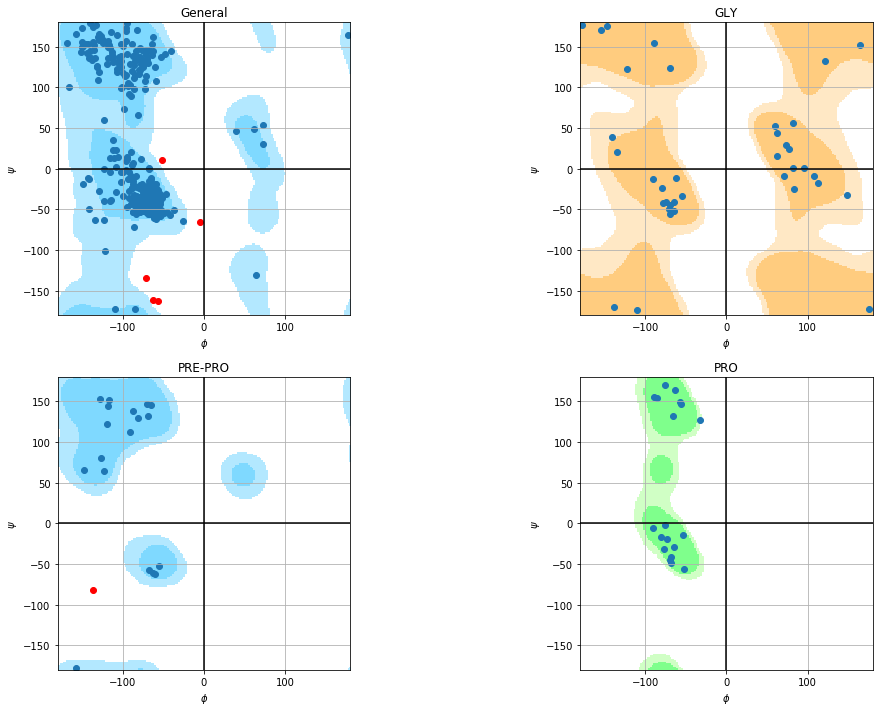

In [27]:
ramachandran([a, b])